In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
#reading data, coverting all '?' to Nan 
df= pd.read_csv('pakistan_cricket_dataset.csv',sep=',')

In [46]:
df.head(5)

,ConsecutiveWins,Season,Opposition_Others,Country,Ground,Home_Ground,Day_Night,PitchReport,BattingFirst,Pak_Win
0,0,Summer,New Zealand,New Zealand,Wellington,No,Yes,bouncy,Yes,No
1,0,Summer,New Zealand,South Africa,Queenstown,No,No,bouncy,Yes,No
2,0,Summer,New Zealand,New Zealand,Christchurch,No,Yes,bouncy,Yes,Yes
3,1,Summer,New Zealand,New Zealand,Napier,No,Yes,bouncy,No,Yes
4,2,Summer,New Zealand,New Zealand,Hamilton,No,Yes,bouncy,Yes,Yes


In [47]:
df.shape

(95, 10)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 10 columns):
ConsecutiveWins      95 non-null int64
Season               95 non-null object
Opposition_Others    95 non-null object
Country              95 non-null object
Ground               95 non-null object
Home_Ground          95 non-null object
Day_Night            95 non-null object
PitchReport          95 non-null object
BattingFirst         95 non-null object
Pak_Win              95 non-null object
dtypes: int64(1), object(9)
memory usage: 7.5+ KB


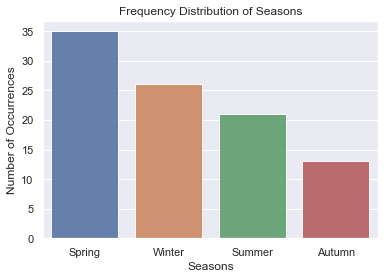

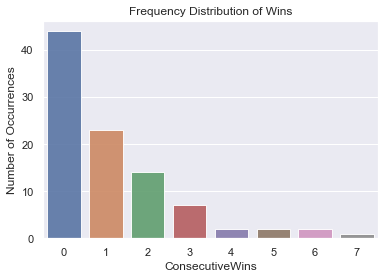

In [49]:
%matplotlib inline
import seaborn as sns
contact_count = df['Season'].value_counts()
sns.set(style="darkgrid")
sns.barplot(contact_count.index, contact_count.values, alpha=0.9)
plt.title('Frequency Distribution of Seasons')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Seasons', fontsize=12)
plt.show()
%matplotlib inline
import seaborn as sns
contact_count = df['ConsecutiveWins'].value_counts()
sns.set(style="darkgrid")
sns.barplot(contact_count.index, contact_count.values, alpha=0.9)
plt.title('Frequency Distribution of Wins')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ConsecutiveWins', fontsize=12)
plt.show()


In [50]:
#Encode the categorical data
for col in df.columns:
    if df[col].dtype==object:
           df[col]=df[col].astype('category')
           df[col]=df[col].cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 10 columns):
ConsecutiveWins      95 non-null int64
Season               95 non-null int8
Opposition_Others    95 non-null int8
Country              95 non-null int8
Ground               95 non-null int8
Home_Ground          95 non-null int8
Day_Night            95 non-null int8
PitchReport          95 non-null int8
BattingFirst         95 non-null int8
Pak_Win              95 non-null int8
dtypes: int64(1), int8(9)
memory usage: 1.7 KB


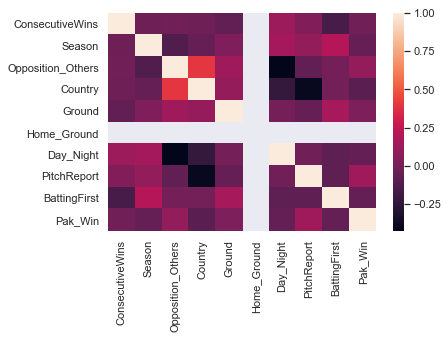

In [51]:
#correlation in data
corr = df.corr()
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [52]:
#dividing the data into attributes and labels
X = df.drop('Pak_Win', axis=1) 
y = df['Pak_Win']  

In [57]:
#spliting in train and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with

# Take the first two features. We could avoid this by using a two-dim dataset 
X = df.drop('Pak_Win', axis=1) 
y = df['Pak_Win'] 
X =X.iloc[:,2:4]
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 2.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('CONSECUTIVE WINS')
    ax.set_ylabel('SEASONS')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Automatically created module for IPython interactive environment


C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [59]:
#lINEAR KERNEL
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)  

In [61]:
#Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[3 5]
 [4 7]]
              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.58      0.64      0.61        11

   micro avg       0.53      0.53      0.53        19
   macro avg       0.51      0.51      0.50        19
weighted avg       0.52      0.53      0.52        19



In [64]:
#ACCURACY
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5263157894736842


In [66]:
#Polynomial Kernel
#Polynomial Kernel
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly', degree=3)  
svclassifier.fit(X_train, y_train)  

C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [68]:
#Preditions using Polynomoal Kernel
y_pred = svclassifier.predict(X_test)  

In [70]:
#Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[1 7]
 [6 5]]
              precision    recall  f1-score   support

           0       0.14      0.12      0.13         8
           1       0.42      0.45      0.43        11

   micro avg       0.32      0.32      0.32        19
   macro avg       0.28      0.29      0.28        19
weighted avg       0.30      0.32      0.31        19



In [72]:
#ACCURACY
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3157894736842105


In [74]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train) 

C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [82]:
#Preditions using Polynomoal Kernel
y_pred = svclassifier.predict(X_test)  

In [78]:
#Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[3 5]
 [4 7]]
              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.58      0.64      0.61        11

   micro avg       0.53      0.53      0.53        19
   macro avg       0.51      0.51      0.50        19
weighted avg       0.52      0.53      0.52        19



In [80]:
#ACCURACY
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5263157894736842


In [83]:
#sigmoid
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train) 

C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [84]:
#Preditions using Polynomoal Kernel
y_pred = svclassifier.predict(X_test)  

In [85]:
#Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[3 5]
 [6 5]]
              precision    recall  f1-score   support

           0       0.33      0.38      0.35         8
           1       0.50      0.45      0.48        11

   micro avg       0.42      0.42      0.42        19
   macro avg       0.42      0.41      0.41        19
weighted avg       0.43      0.42      0.42        19



In [86]:
#ACCURACY
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.42105263157894735
